Using ANN for regression problem.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../Downloads/Data for ML/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info() #Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()           #Checking for duplication

0

In [9]:
df.drop(columns=['Serial No.'], inplace=True)

In [10]:
X = df.iloc[:, 0: -1]
y = df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

Now we want to do scaling of the features. Here we are using min_max scaling instead of standard scaling. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test) 
print(X_train_mm)

[[0.62       0.59259259 0.5        ... 0.625      0.64102564 1.        ]
 [0.96       0.88888889 0.75       ... 0.875      0.8525641  1.        ]
 [0.56       0.51851852 0.5        ... 0.625      0.47115385 1.        ]
 ...
 [0.54       0.48148148 0.5        ... 0.5        0.34935897 1.        ]
 [0.2        0.25925926 0.5        ... 0.5        0.59615385 1.        ]
 [0.46       0.33333333 0.5        ... 0.375      0.6025641  0.        ]]


NN architecture:
--> One hidden layer with 7 nodes. 
--> Output layer with 1 node.

In [13]:
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

/Users/fnuarjun/PycharmProjects/ML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [37]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 7)                 56        
                                                                 
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train_mm, y_train, epochs=40, validation_split=0.2)

Epoch 1/40
10/10 [==============================] - 0s 28ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 5/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 10/40
10/10 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 11/40
10/10 

In [42]:
y_pred = model.predict(X_test_mm)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'r2_score: {r2}')

4/4 [==============================] - 0s 693us/step
r2_score: 0.7683504554522853


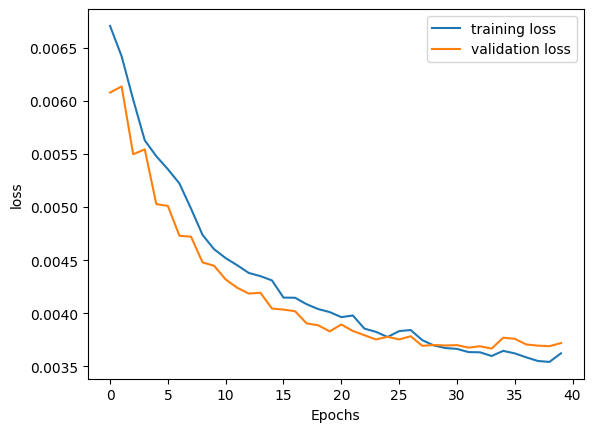

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()